<a href="https://colab.research.google.com/github/UAPH451551/PH451_551_Sp23/blob/main/Hackathons/Hackathon_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hackathon #1 Spring 2023

**Background:** High-energy collisions at the Large Hadron Collider (LHC) <br> produce particles that interact with particle detectors. One important task is <br> 
to classify different types of collisions based on their physics content,<br> allowing physicists to find patterns in the data and to potentially unravel new <br> discoveries. 

**Problem statement:** The discovery of the Higgs boson by CMS and ATLAS <br>
Collaborations was announced at CERN in 2012. In this challenge, we will use <br>
machine learning to classify events containing Higgs bosons from the background <br>
events which do not contain Higgs bosons.

**Dataset:** The dataset is hosted by the Center for Machine Learning  <br>
and Intelligent Systems at University of California, Irvine. <br>
The dataset can be found on the [UCI Machine learning Repository](https://archive.ics.uci.edu/ml/datasets/HIGGS)

**Description:** The dataset consists of a total of 11 million labeled samples <br> 
of Higgs and background events produced by Monte Carlo simulations. Each sample <br> 
consists of 28 features. The first 21 features are kinematic properties <br>
of the events. The last seven are functions of the first 21. The data labels <br>
are 1 for signal (an event with Higgs bosons) and 0 for background (an event <br>
without Higgs bosons).

**Steps to load the training dataset**
1. Download the dataset from the UCI website. 

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz

--2023-02-13 19:04:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2816407858 (2.6G) [application/x-httpd-php]
Saving to: ‘HIGGS.csv.gz.2’

HIGGS.csv.gz.2      100%[===================>]   2.62G  15.0MB/s    in 3m 51s  

2023-02-13 19:08:42 (11.6 MB/s) - ‘HIGGS.csv.gz.2’ saved [2816407858/2816407858]



2. Unzip the dataset folder

In [ ]:
 !gzip -d HIGGS.csv.gz

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt

**Load the file using pandas library**

In [ ]:
data = pd.read_csv('./HIGGS.csv')

The first column is the labels (y). The other columns are all of our inputs (X).

The above dataset is a pandas dataframe. We can access the data using iloc. <br>
After that, we can turn it into a numpy array if we want or leave it as a <br>
pandas dataframe. **Use whatever you feel most comfortable with**.


In [ ]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
#X = X.to_numpy(dtype=float) #Convert pandas dataframe to numpy array (optional)
#y = y.to_numpy(dtype=int)   #Convert pandas dataframe to numpy array (optional)

In [ ]:
print(X.shape)

(10999999, 28)


To generate the following examples we used a smaller dataset containing only <br>
10,000 events. You may want to do something similar while getting your code <br>
set up but you should eventually use the full dataset.

**For final hackathon task submissions you should use the full dataset.**

In [ ]:
#X = X[:10000]
#y = y[:10000]

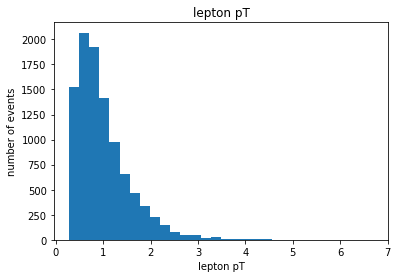

In [ ]:
plt.hist(X.iloc[:,0], bins=30)
plt.title("lepton pT")
plt.xlabel("lepton pT")
plt.ylabel("number of events")
plt.show()

Next we can split our data into 80% training data, 10% validation data, 10% <br>
test data. 

For the rest of this hackathon, use `X_train`, `X_val`, `X_test` as input <br>
data and `y_train`, `y_val`, `y_test` as output data.

In [ ]:
X_train, X_val1, y_train, y_val1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val1, y_val1, test_size=0.5, random_state=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(8000, 28)
(1000, 28)
(1000, 28)
(8000,)
(1000,)
(1000,)


## **REMINDER: Use the Higgs dataset provided above for the Hackathon**

## Hackathon Task 1:

Data: `X_train`

Generate histograms of the different variables in `X_train` with proper axis <br>
labels and titles.

Detailed information on what each feature column is can be found in <br> *Attribute Information* section on the [UCI Machine learning Repository](https://archive.ics.uci.edu/ml/datasets/HIGGS). <br> 
For further information, refer to the [paper](https://www.nature.com/articles/ncomms5308) by Baldi et. al

**Hint:** The first item is lepton pT.

The following may be helpful:

`names = ["lepton pT", "lepton eta", "lepton phi", "missing energy magnitude",` <br> 
`"missing", "energy phi", "jet 1 pt", "jet 1 eta", "jet 1 phi", "jet 1 b-tag",` <br> 
`"jet 2 pt", "jet 2 eta","jet 2 phi", "jet 2 b-tag", "jet 3 pt", "jet 3 eta",` <br> 
`"jet 3 phi", "jet 3 b-tag", "jet 4 pt", "jet 4 eta", "jet 4 phi", "jet 4"` <br>` "b-tag", "m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"]`

`for index, name in enumerate(names):`

## Hackathon Task 2:

Data: `X_train`, `y_train`, `X_val`, `y_val`

Train a model by fitting it to the training data. Use at least one metric <br>
such as roc_auc_score, accuracy, etc. to analyze the model's performance on the <br>
validation data. Using that performance metric, optimize or improve your model. <br>
It should be clear from your notebook how you perform this optimization.

## Hackathon Task 3:

Data: `X_test`, `y_test`

**Note: The test data should be used only for final performance evaluation.** <br>
**Validation data can be used to tune your model but test data should not be** <br>
**used for model tuning.**

Without having done any optimization using the testing data set, analyze the <br>
performance of the model on the testing data. Your analysis should include <br> [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html), a ROC curve plot
(see [1](https://plot-metric.readthedocs.io/en/latest/), [2](https://github.com/UAPH451551/PH451_551_Sp23/blob/main/Exercises/Statistics_1.ipynb), [3](https://github.com/UAPH451551/PH451_551_Sp23/blob/main/Exercises/01_Classification.ipynb)), and at least one other plot of <br>
your choice such as precision-recall curves, confusion matrix, etc.


# Deliverables:

**Reminder: The hackathon tasks should be done using the Higgs dataset.** <br>
A pdf of the notebook with all three hackathon tasks completed. <br>
A copy of your colab/jupyter notebook with all three hackathon tasks completed. <br>


File name convention: For group 42 and memebers Richard Stallman and Linus <br>
Torvalds it would be "Hackathon1_42_Stallman_Torvalds.pdf" and  <br>
"Hackathon1_42_Stallman_Torvalds.ipynb".

Submission via blackboard (UA).

# Examples

### The examples below use a different dataset (breast cancer diagnosis dataset) 
### than what is provided above.
### Please use the Higgs data set for the hackathon.

**Note: The following examples are meant to provide a starting point. You are** <br>
**encouraged to get creative. Feel free to look back to earlier assignments for** <br>
**inspiration and code examples.**

## Decision Tree Example

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
dataset = load_breast_cancer() #Use the Higgs dataset for the hackathon
X = dataset["data"]
y = dataset["target"]

In [ ]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    random_state=42
)

In [ ]:
classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200, random_state=42)

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
y_hat = classifier.predict_proba(X_test)[:, 1]

In [ ]:
confusion_matrix(y_test, predictions)

array([[ 62,   1],
       [  2, 106]])

In [ ]:
accuracy_score(y_test, predictions)

0.9824561403508771

In [ ]:
!pip install plot_metric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


AUC: 0.9977954144620811


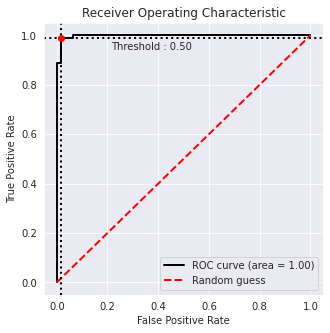

In [ ]:
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_hat, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
_,_,_,auc = bc.plot_roc_curve()
print("AUC:", auc)
plt.show()

## Basic Neural Network Example

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer

In [ ]:
model_nn = Sequential()
model_nn.add(Dense(30, input_dim=30, activation='relu'))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

In [ ]:
dataset = load_breast_cancer() #Use the Higgs dataset for the hackathon
X = dataset["data"]
y = dataset["target"]

In [ ]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [ ]:
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

In [ ]:
# compile the keras model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model_nn.fit(X, y, validation_data=(X_val, y_val), epochs=5, batch_size=10)
# evaluate the keras model
_, accuracy = model_nn.evaluate(X, y)
model_nn.save('my_model.h5') ##Saving model weights
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/5
57/57 [==============================] - 2s 6ms/step - loss: 24.2189 - accuracy: 0.5975 - val_loss: 0.5940 - val_accuracy: 0.7791
Epoch 2/5
57/57 [==============================] - 0s 4ms/step - loss: 0.4421 - accuracy: 0.8207 - val_loss: 0.2966 - val_accuracy: 0.8721
Epoch 3/5
57/57 [==============================] - 0s 6ms/step - loss: 0.2977 - accuracy: 0.8858 - val_loss: 0.1998 - val_accuracy: 0.9535
Epoch 4/5
57/57 [==============================] - 0s 5ms/step - loss: 0.2738 - accuracy: 0.9033 - val_loss: 0.2298 - val_accuracy: 0.9302
Epoch 5/5
18/18 [==============================] - 0s 3ms/step - loss: 0.2275 - accuracy: 0.9174
Accuracy: 91.74


In [ ]:
predictions = model_nn.predict(X_test)

3/3 [==============================] - 0s 3ms/step


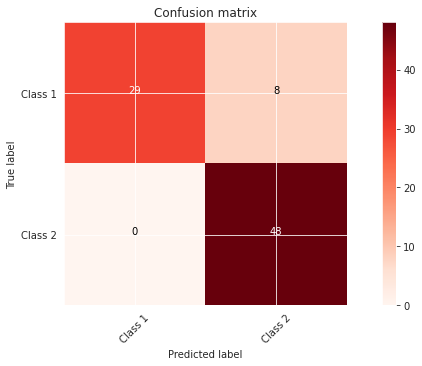

In [ ]:
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
bc_nn = BinaryClassification(y_test, predictions, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,5))
bc_nn.plot_confusion_matrix()
plt.show()

AUC: 0.9859234234234234


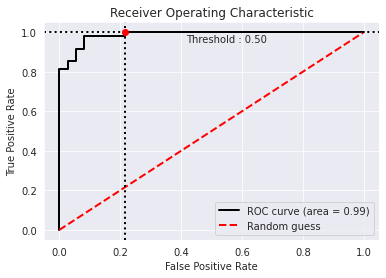

In [ ]:
_,_,_,auc = bc_nn.plot_roc_curve()
print("AUC:", auc)
plt.show()